#  Churn Prediction

### Project Submission


# Business Understanding

### Overview

Customer Churn is one of the most important and challenging problems for businesses such as Credit Card companies, cable service providers, SASS and telecommunication companies worldwide.

What is a Customer churn?

Customer churn can be used to define customers who:

1. Have completely stopped interacting or unsubscribed from a brand, or
2. Customers who have reduced how often they interact with your brand.

Customer churn is a metric used to gain insights into the Customer Attrition Rate in a given business organization. Customer Attrition Rate measures customer loss as a percentage of the total customer base. For example, if SyriaTel provides the "international call" services on an annual subscription basis, and had 1,000 customers subscribed as of Jan. 1st 2022, but on the same date in 2023, just 800 renewed. The Churn rate would be 20%. If SyriaTel earns a profit of 10 dollars per customer per month, that would mean churned customers costs the company 2,000 dollars in profits every month, reducing the profit from 10,000 dollars to 8,000 dollars a month.

Churn analysis could help business organizations to understand the cause behind the Customer churn and implement appropriate strategies to ensure retention. Additionally, Churn analysis takes precedence as it is always more challenging and costly to attract new customers compared to retaining current customers.Therefore predicting and preventing Customer churn is important as it depicts additional potential revenue source for any interested business entity. 

# 1. Data Understanding:

We will use the SyriaTel dataset available on Kaggle (https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). 
The goal is to "build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company". 

## Load the dataset

In [44]:
import pandas as pd

# Reading the csv file into the dataframe
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

# Let's look at the first 10 records
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [45]:
# Checking the dimensionalities of our dataset
print(df.shape)

(3333, 21)


From Pandas .shape attribute, we can see our dataset contains 21 columns and 3333 rows. We have 20 predictors and the target feature, 'churn'.

In [46]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [47]:
# To get the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset does not contain missing values. The columns are of mixed data types; numeric columns, bool dtype and object dtypes columns.

In [48]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The dataset does not contain null values in any of the columns.

In [49]:
# Checking for duplicates
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:", duplicate_rows)


Duplicate Rows: Empty DataFrame
Columns: [state, account length, area code, phone number, international plan, voice mail plan, number vmail messages, total day minutes, total day calls, total day charge, total eve minutes, total eve calls, total eve charge, total night minutes, total night calls, total night charge, total intl minutes, total intl calls, total intl charge, customer service calls, churn]
Index: []

[0 rows x 21 columns]


There are no duplicates in our dataset.

In [50]:
# Descriptive Analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


Note: Considering the min and max values, we see the values are of different scales, so we can consider scaling.

# 2. Data Preparation

Since we have no missing values, no duplicates, no outliers and no null values in our dataset, we proceed with EDA.

# Exploratory Data Analysis

## Univariate Analysis: 
### Explore our target variable

In [51]:
# Checking the distribution of values in the target feature
y = df.churn.value_counts()
y

churn
False    2850
True      483
Name: count, dtype: int64

In [52]:
y_True = df["churn"][df["churn"] == True]
print ("True Churn Percentage = "+str( (y_True.shape[0] / df["churn"].shape[0]) * 100 ))

y_False = df["churn"][df["churn"] == False]
print ("False Churn Percentage = "+ str((len(y_False) / df["churn"].shape[0]) * 100))

True Churn Percentage = 14.491449144914492
False Churn Percentage = 85.5085508550855


Below, we visualizing the distribution of True and False values in the target feature.

<AxesSubplot:xlabel='churn'>

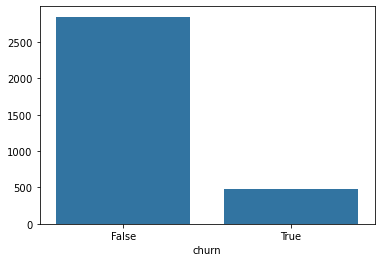

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.barplot(x = y.index, y = y.values)

From our exploration of the target above, we have an imbalanced data with the True class having fewer datapoints than the False class.

In [54]:
# We create a copy so that we maintain the original dataframe with no modifications
new_df = df.copy()
new_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [55]:
# Dropping the columns we will not be using in our analysis

columns_to_drop = ['phone number', 'voice mail plan', 'number vmail messages']
new_df.drop(columns=columns_to_drop, inplace=True,axis=1)
new_df

,state,account length,area code,international plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


## Feature Engineering

To assess the overall usage and charge of a customer in terms of total minutes,total calls and total charge we create a new columns "total_minutes", "total_calls", and "total_charge".

In [56]:
new_df['total_minutes'] = new_df['total day minutes'] + new_df['total eve minutes'] + new_df['total night minutes'] + new_df['total intl minutes']

In [57]:
new_df['total_calls'] = new_df['total day calls'] + new_df['total eve calls'] + new_df['total night calls'] +new_df['total intl calls']

In [58]:
new_df['Total_charge'] = new_df['total day charge'] + new_df['total eve charge'] + new_df['total intl charge']
new_df

,state,account length,area code,international plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_minutes,total_calls,Total_charge
0,KS,128,415,no,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,False,717.2,303,64.55
1,OH,107,415,no,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,False,625.2,332,47.79
2,NJ,137,415,no,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,False,539.4,333,54.97
3,OH,84,408,yes,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,False,564.8,255,57.94
4,OK,75,415,yes,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,False,512.0,359,43.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,156.2,77,26.55,215.5,126,18.32,...,83,12.56,9.9,6,2.67,2,False,660.7,292,47.54
3329,WV,68,415,no,231.1,57,39.29,153.4,55,13.04,...,123,8.61,9.6,4,2.59,3,False,585.4,239,54.92
3330,RI,28,510,no,180.8,109,30.74,288.8,58,24.55,...,91,8.64,14.1,6,3.81,2,False,675.6,264,59.10
3331,CT,184,510,yes,213.8,105,36.35,159.6,84,13.57,...,137,6.26,5.0,10,1.35,2,False,517.6,336,51.27


## Bivariate Analysis

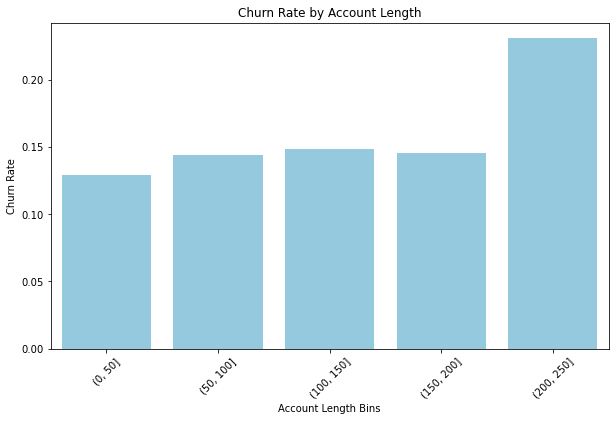

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create bins for account length
bins = [0, 50, 100, 150, 200, 250]

# Create a new column for account length bins
new_df['account_length_bin'] = pd.cut(new_df['account length'], bins=bins)

# Calculate the churn rate for each account length bin
churn_rate_by_length = new_df.groupby('account_length_bin')['churn'].mean()

# Plot the churn rate
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_length.index, y=churn_rate_by_length.values, color='skyblue')
plt.title('Churn Rate by Account Length')
plt.xlabel('Account Length Bins')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

The Churn rate for customers with account length between 0 - 200 days is relatively stable. Customers with account length exceeding 200 days are likely to churn.